<a href="https://www.kaggle.com/code/haiderjan/house-price-prediction?scriptVersionId=124295125" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
##Import all the libraries needed to run the project successfully
##Pandas to use for making and manipulating dataframes
import pandas as pd
##Seaborn for plotting purposes
import seaborn as sns
#Matplotlib for plotting purposes
import matplotlib.pyplot as plt

##Numpy for array processing
import numpy as np

from sklearn.model_selection import cross_val_score

##Gradient boosting regressor which will be used as a machine learning model
from sklearn.ensemble import GradientBoostingRegressor

##label encoder for encoding categorical labels with their values
from sklearn.preprocessing import LabelEncoder

#Mean squared error to compute the score of computed from our cross validation data sets
from sklearn.metrics import mean_squared_error 

# #**Read in Our Data**

In [2]:
df=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
y_train=df['SalePrice']
test=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
##Drop the Id and Saleprice from the training datasets as Id isnt considered an important feature
train=df.drop(['Id','SalePrice' ],axis=1)

In [4]:
##Doing the same for the test data and dropping Id, we will be predicting the Saleprice for this data
test=test.drop(['Id'], axis=1)

In [5]:
##Concatenate botht the training and testing data for cleaning purposes
X=pd.concat([train,test],ignore_index=True)

# #**Take a Look at Our Data**

In [6]:
#Check the shape of the data
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


**Observe the feaqtures with null values**

In [7]:
X.info()
X.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [8]:
#Fill the null values for categorical features
X['Alley']=X['Alley'].fillna('No')
X['FireplaceQu']=X['FireplaceQu'].fillna('No')
X['PoolQC']=X['PoolQC'].fillna('No')
X['Fence']=X['Fence'].fillna('No')
X['MiscFeature']=X['MiscFeature'].fillna('No')
display(X)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,...,0,0,No,No,No,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,...,0,0,No,No,No,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,Corner,...,0,0,No,No,No,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,FR2,...,0,0,No,No,No,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,MnPrv,Shed,700,7,2006,WD,Normal


# **Get a list of all columns with null values**

In [9]:
cols=[]
for col in X.columns:
    if X[col].isnull().sum()>0:
        cols.append(col)
print(cols)

['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'SaleType']


# **Divide this list into two and then read the features out of each list to make reading more easy**

In [10]:
cols1=cols[:int(len(cols)/2)]
print(cols1)
cols2=cols[int(len(cols)/2):]
print(cols2)
display(X[cols1])
display(X[cols2])

['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2']
['BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'SaleType']


,MSZoning,LotFrontage,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2
0,RL,65.0,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,No,GLQ,706.0,Unf,0.0
1,RL,80.0,AllPub,MetalSd,MetalSd,None,0.0,Gd,TA,Gd,ALQ,978.0,Unf,0.0
2,RL,68.0,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,Mn,GLQ,486.0,Unf,0.0
3,RL,60.0,AllPub,Wd Sdng,Wd Shng,None,0.0,TA,Gd,No,ALQ,216.0,Unf,0.0
4,RL,84.0,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,Av,GLQ,655.0,Unf,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,21.0,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,No,Unf,0.0,Unf,0.0
2915,RM,21.0,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,No,Rec,252.0,Unf,0.0
2916,RL,160.0,AllPub,VinylSd,VinylSd,None,0.0,TA,TA,No,ALQ,1224.0,Unf,0.0
2917,RL,62.0,AllPub,HdBoard,Wd Shng,None,0.0,Gd,TA,Av,GLQ,337.0,Unf,0.0


,BsmtUnfSF,TotalBsmtSF,Electrical,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,SaleType
0,150.0,856.0,SBrkr,1.0,0.0,Gd,Typ,Attchd,2003.0,RFn,2.0,548.0,TA,TA,WD
1,284.0,1262.0,SBrkr,0.0,1.0,TA,Typ,Attchd,1976.0,RFn,2.0,460.0,TA,TA,WD
2,434.0,920.0,SBrkr,1.0,0.0,Gd,Typ,Attchd,2001.0,RFn,2.0,608.0,TA,TA,WD
3,540.0,756.0,SBrkr,1.0,0.0,Gd,Typ,Detchd,1998.0,Unf,3.0,642.0,TA,TA,WD
4,490.0,1145.0,SBrkr,1.0,0.0,Gd,Typ,Attchd,2000.0,RFn,3.0,836.0,TA,TA,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,546.0,546.0,SBrkr,0.0,0.0,TA,Typ,NaN,NaN,NaN,0.0,0.0,NaN,NaN,WD
2915,294.0,546.0,SBrkr,0.0,0.0,TA,Typ,CarPort,1970.0,Unf,1.0,286.0,TA,TA,WD
2916,0.0,1224.0,SBrkr,1.0,0.0,TA,Typ,Detchd,1960.0,Unf,2.0,576.0,TA,TA,WD
2917,575.0,912.0,SBrkr,0.0,1.0,TA,Typ,NaN,NaN,NaN,0.0,0.0,NaN,NaN,WD


# #**Fill in for missing Values appropriately**

In [11]:
for col in cols:
    if col in ['MasVnrArea','BsmtFinSF1','BsmtFinSF2','GarageArea','BsmtUnfSF','TotalBsmtSF']:
        X[col]=X[col].fillna(X[col].mean())
    if col in ['BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars']:
        X[col]=X[col].fillna(X[col].median())
    else:
        X[col]=X[col].fillna(X[col].mode()[0])
X.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

# **Make a list of all features with data type==object**

In [12]:
cols=[]
dt=[]
for col in X.columns:
    if X[col].dtype=='object':
        cols.append(col)
        dt.append(X[col].dtype)
print(cols)          

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


**Label encode all the categorical features**

In [13]:
LE=LabelEncoder()
for col in cols:
    X[col]=LE.fit_transform(X[col])
display(X)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,1,3,3,0,4,...,0,0,3,4,1,0,2,2008,8,4
1,20,3,80.0,9600,1,1,3,3,0,2,...,0,0,3,4,1,0,5,2007,8,4
2,60,3,68.0,11250,1,1,0,3,0,4,...,0,0,3,4,1,0,9,2008,8,4
3,70,3,60.0,9550,1,1,0,3,0,0,...,0,0,3,4,1,0,2,2006,8,0
4,60,3,84.0,14260,1,1,0,3,0,2,...,0,0,3,4,1,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,4,21.0,1936,1,1,3,3,0,4,...,0,0,3,4,1,0,6,2006,8,4
2915,160,4,21.0,1894,1,1,3,3,0,4,...,0,0,3,4,1,0,4,2006,8,0
2916,20,3,160.0,20000,1,1,3,3,0,4,...,0,0,3,4,1,0,9,2006,8,0
2917,85,3,62.0,10441,1,1,3,3,0,4,...,0,0,3,2,3,700,7,2006,8,4


# #**Observe the distributions of all features**

<function matplotlib.pyplot.show(close=None, block=None)>

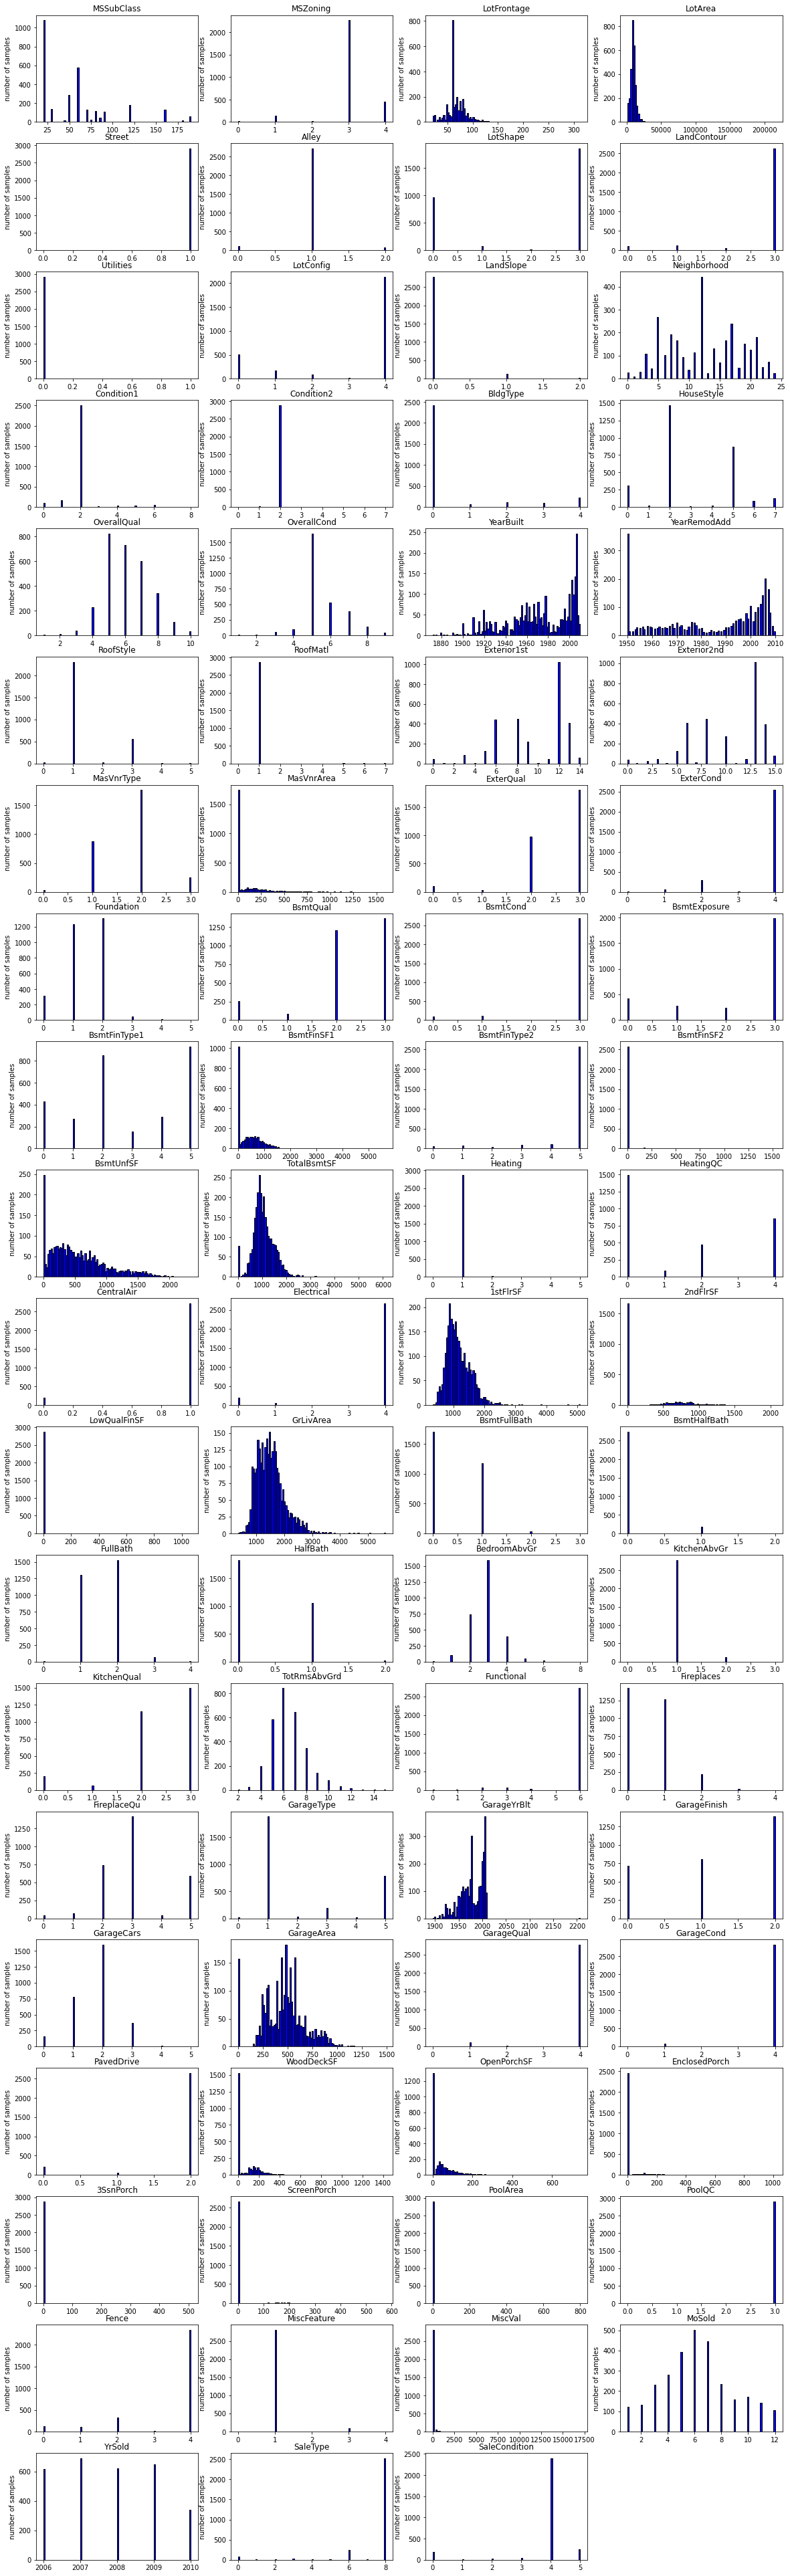

In [14]:
fig=plt.figure(figsize=(20,70))
for i in range(1,X.shape[1]+1):
    ax=fig.add_subplot(int(X.shape[1]/4)+1,4,i)
    ax.set_title(X.columns[i-1])
    ax.set_ylabel('number of samples')
    ax.hist(X[X.columns[i-1]],bins=100,ec='black',color='b')
plt.show

# #**Dropping redundant features**

Looking at the Distribution of each of the feature in the dataset, we cana easily drop some. Below in the code are some of the features I dropped due to obvious reasones mainly because the outcome of the feature was same more or less for all the samples, the variance is extremely low and so there is no information for the model to extract from that feature so its better that we completely eliminate them.

Ypu can also take a look at these features for yourselves and test out for different cases.

In [15]:
##Dropping Features which we deem un necessary
X=X.drop(['Street','Utilities','Condition2','RoofMatl','BsmtFinSF2','Heating','LowQualFinSF','3SsnPorch','ScreenPorch','PoolArea','PoolQC','MiscFeature','MiscVal',],axis=1)
##Getting the training data from the total concatenated data 
X_train=X.iloc[:train.shape[0],:]
X_test=X.iloc[train.shape[0]:,:]
display(X_train)
display(X_test)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,3,3,4,0,5,...,4,2,0,61,0,4,2,2008,8,4
1,20,3,80.0,9600,1,3,3,2,0,24,...,4,2,298,0,0,4,5,2007,8,4
2,60,3,68.0,11250,1,0,3,4,0,5,...,4,2,0,42,0,4,9,2008,8,4
3,70,3,60.0,9550,1,0,3,0,0,6,...,4,2,0,35,272,4,2,2006,8,0
4,60,3,84.0,14260,1,0,3,2,0,15,...,4,2,192,84,0,4,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,3,3,4,0,8,...,4,2,0,40,0,4,8,2007,8,4
1456,20,3,85.0,13175,1,3,3,4,0,14,...,4,2,349,0,0,2,2,2010,8,4
1457,70,3,66.0,9042,1,3,3,4,0,6,...,4,2,0,60,0,0,5,2010,8,4
1458,20,3,68.0,9717,1,3,3,4,0,12,...,4,2,366,0,112,4,4,2010,8,4


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition
1460,20,2,80.0,11622,1,3,3,4,0,12,...,4,2,140,0,0,2,6,2010,8,4
1461,20,3,81.0,14267,1,0,3,0,0,12,...,4,2,393,36,0,4,6,2010,8,4
1462,60,3,74.0,13830,1,0,3,4,0,8,...,4,2,212,34,0,2,3,2010,8,4
1463,60,3,78.0,9978,1,0,3,4,0,8,...,4,2,360,36,0,4,6,2010,8,4
1464,120,3,43.0,5005,1,0,1,4,0,22,...,4,2,0,82,0,4,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,4,21.0,1936,1,3,3,4,0,10,...,4,2,0,0,0,4,6,2006,8,4
2915,160,4,21.0,1894,1,3,3,4,0,10,...,4,2,0,24,0,4,4,2006,8,0
2916,20,3,160.0,20000,1,3,3,4,0,11,...,4,2,474,0,0,4,9,2006,8,0
2917,85,3,62.0,10441,1,3,3,4,0,11,...,4,2,80,32,0,2,7,2006,8,4


# # **Distribution of Label (SalePrice)**

We observe that the distribution here is kind of skewed, we will apply a traqnsofrmation in the coming code blocks and then view the statistical features

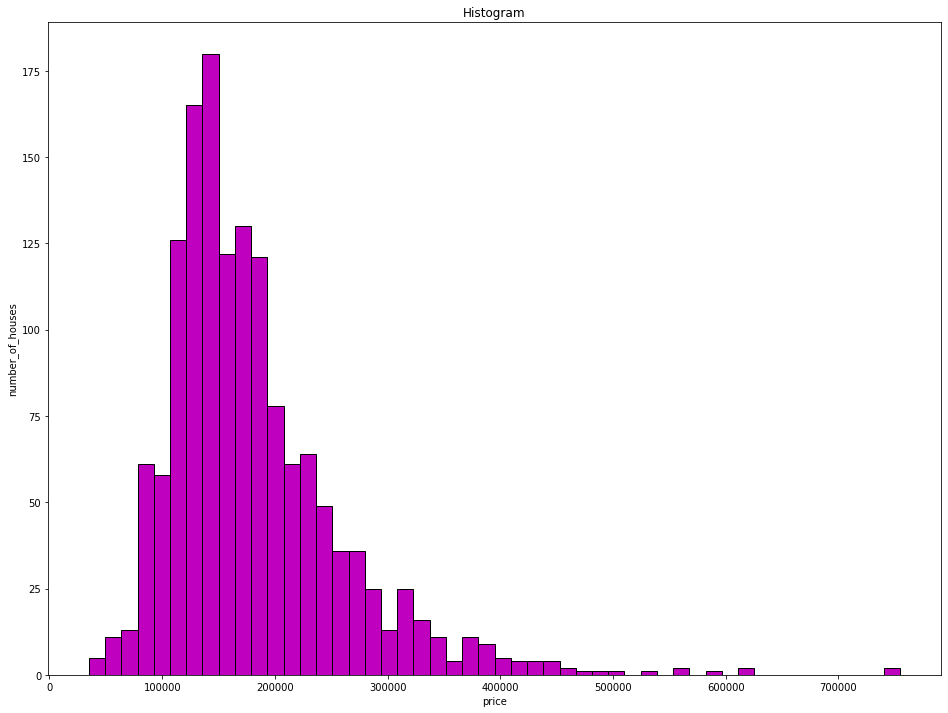

Mean: 180921.19589041095
Variance: 6311111264.297448
Median: 163000.0
Min: 34900
Max: 755000


In [16]:
fig=plt.figure(figsize=(16,12))
ax=fig.add_subplot(1,1,1)
ax.set_title('Histogram')
ax.set_xlabel('price')
ax.set_ylabel('number_of_houses')
ax.hist(y_train,bins=50,ec='black',color='m')
plt.show()
print('Mean:',y_train.mean())
print('Variance:',y_train.var())
print('Median:',y_train.median())
print('Min:',y_train.min())
print('Max:',y_train.max())

**Getting the statistical knowledge about the label**

Changing the distribution shape to log distribution and finding the statistical frequentist values of the resulting log distribution, this looks more like a normal distribution now
1. Mean
2. Median
3. Variance
4. Min
5. Max


Distribution of Label Log(SalePrice)

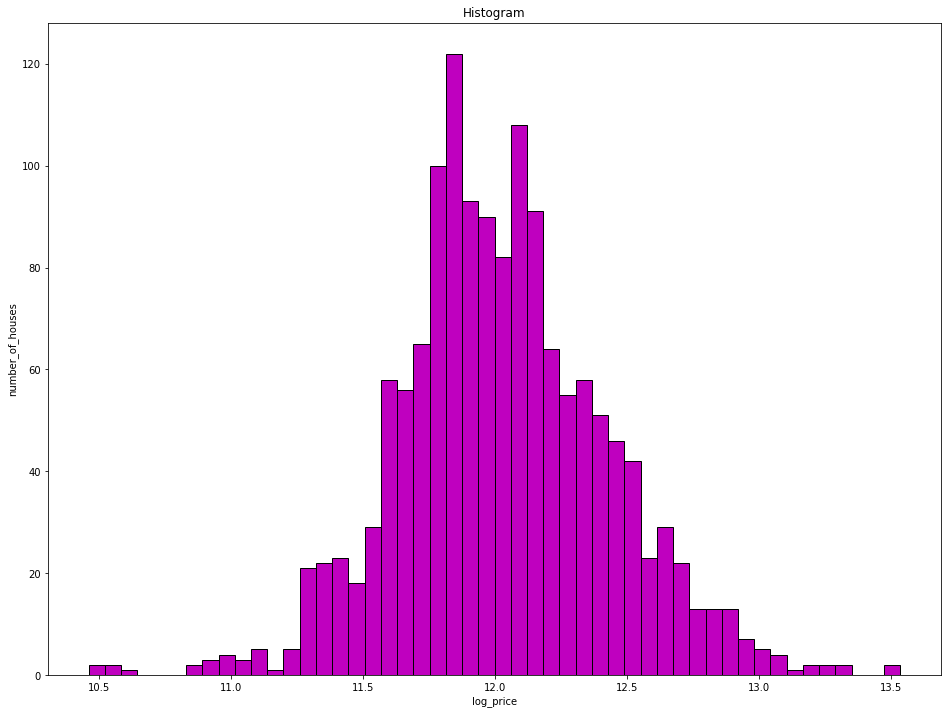

Mean: 12.024050901109383
Variance: 0.15956179505733453
Median: 12.0015054797889
Min: 10.460242108190519
Max: 13.534473028231162


In [17]:
y_train=np.log(y_train)
fig=plt.figure(figsize=(16,12))
ax=fig.add_subplot(1,1,1)
ax.set_title('Histogram')
ax.set_xlabel('log_price')
ax.set_ylabel('number_of_houses')
ax.hist(y_train,bins=50,ec='black',color='m')
plt.show()
print('Mean:',y_train.mean())
print('Variance:',y_train.var())
print('Median:',y_train.median())
print('Min:',y_train.min())
print('Max:',y_train.max())

****

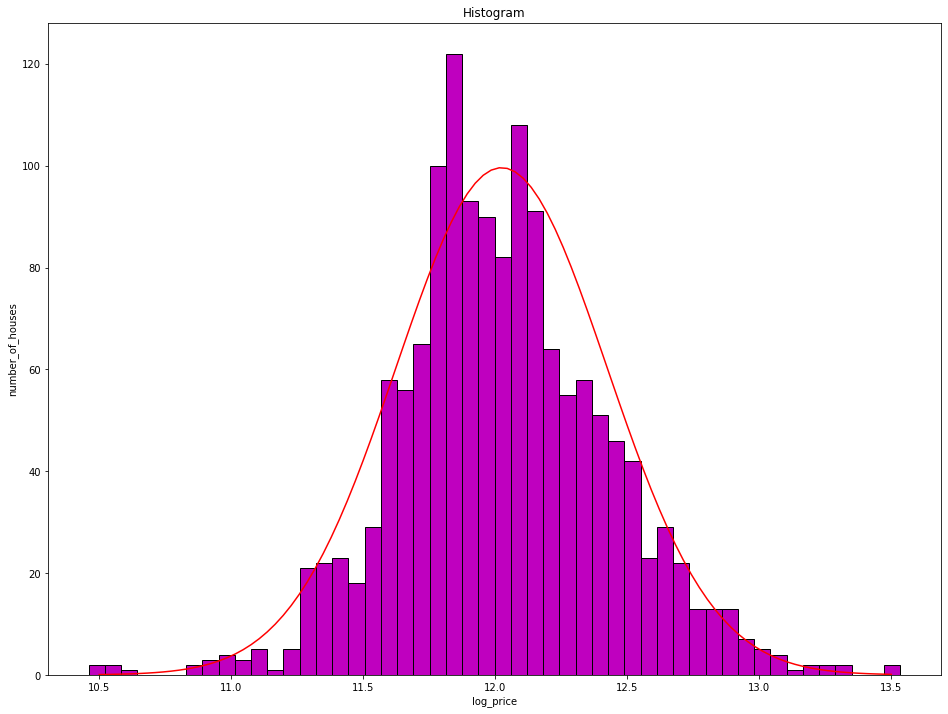

In [18]:
fig=plt.figure(figsize=(16,12))
ax=fig.add_subplot(1,1,1)
ax.set_title('Histogram')
ax.set_xlabel('log_price')
ax.set_ylabel('number_of_houses')
ax.hist(y_train,bins=50,ec='black',color='m')
x=np.linspace(10.5,13.5,100)
y=250*(1/(2*np.pi*y_train.var()**0.5))*np.exp(-((x-y_train.mean())**2)/(2*y_train.var()))
ax.plot(x,y,color='r')
plt.show()

##Fitting a line to our distribution just for fun, doesnt it look nice??

# #**Preparing Splits**

1. Splits created using the training Data
2. 5% of the training data is used for the validation data
3. The split is done using a random stratified sampling technique

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=0)
display(X_train)
display(X_val)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition
688,20,3,60.0,8089,1,3,1,4,0,22,...,4,2,140,0,0,4,10,2007,6,5
1122,20,3,60.0,8926,1,0,3,0,0,7,...,4,2,64,0,0,2,10,2009,0,0
866,20,3,67.0,10656,1,0,1,4,0,23,...,4,2,192,80,0,4,11,2007,6,5
1214,85,3,69.0,10205,1,0,3,4,0,12,...,4,2,150,72,0,4,5,2006,8,4
589,40,4,50.0,9100,1,3,3,4,0,3,...,4,1,0,0,0,4,8,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,3,82.0,9430,1,3,3,4,0,15,...,4,2,0,128,0,4,7,2009,8,4
835,20,3,60.0,9600,1,3,3,4,0,19,...,4,2,290,0,0,4,2,2010,8,4
1216,90,4,68.0,8930,1,3,3,4,0,19,...,4,2,0,0,0,4,4,2010,8,4
559,120,3,60.0,3196,1,3,3,4,0,0,...,4,2,143,20,0,4,10,2006,8,4


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition
529,20,3,60.0,32668,1,0,3,1,0,6,...,4,2,0,0,200,4,3,2007,8,2
491,50,3,79.0,9490,1,3,3,4,0,12,...,4,2,0,0,32,2,8,2006,8,4
459,50,3,60.0,7015,1,0,0,0,0,3,...,4,2,0,0,248,4,7,2009,8,4
279,60,3,83.0,10005,1,3,3,4,0,4,...,4,2,288,117,0,4,3,2008,8,4
655,160,4,21.0,1680,1,3,3,4,0,2,...,4,2,0,0,0,4,3,2010,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,50,3,53.0,5362,1,3,3,0,0,6,...,4,2,242,0,81,4,11,2007,8,4
822,60,3,60.0,12394,1,0,3,0,0,8,...,4,2,100,48,0,4,10,2007,8,3
315,60,3,71.0,7795,1,0,3,4,0,8,...,4,2,100,51,0,4,7,2009,8,4
9,190,3,50.0,7420,1,3,3,0,0,3,...,4,2,0,4,0,4,1,2008,8,4


# #**Training the GB regressor Model**
The Mean Squared Errors for the training and validation set is shown below, one fantastic thing about the GB regressor library is that we can get our feature importances scores from the model. This gives us an insight into how each feature plays part in contributing to predict the SalePrice



In [20]:
Model=GradientBoostingRegressor(learning_rate=0.03,max_depth=5,max_features=6,n_estimators=1800,random_state=0).fit(X_train,y_train)
print('Train mse:',mean_squared_error(y_train,Model.predict(X_train)))
print('Val mse:',mean_squared_error(y_val,Model.predict(X_val)))
fi=dict(zip(X_train.columns,Model.feature_importances_))
Fi=pd.DataFrame(index=fi.keys(),data=fi.values(),columns=['Importance'])
display(Fi)
print('Least important features:')
display(Fi.sort_values(by='Importance').iloc[:6])
print('Most important features:')
display(Fi.sort_values(by='Importance').iloc[-6:])

Train mse: 9.197294102300546e-05
Val mse: 0.012112218760651333


,Importance
MSSubClass,0.004143
MSZoning,0.014740
LotFrontage,0.006897
LotArea,0.030511
Alley,0.000635
...,...
Fence,0.001278
MoSold,0.001903
YrSold,0.001104
SaleType,0.000580


Least important features:


,Importance
BsmtHalfBath,0.000190
LotConfig,0.000357
BsmtFinType2,0.000398
SaleType,0.000580
GarageCond,0.000586
Alley,0.000635


Most important features:


,Importance
FullBath,0.046583
YearBuilt,0.048584
TotalBsmtSF,0.056094
ExterQual,0.062920
GrLivArea,0.092616
OverallQual,0.126748


In [21]:
X_train=X_train.drop(Fi.sort_values(by='Importance').iloc[:6].index,axis=1)
X_val=X_val.drop(Fi.sort_values(by='Importance').iloc[:6].index,axis=1)
X_test=X_test.drop(Fi.sort_values(by='Importance').iloc[:6].index,axis=1)
Model_=GradientBoostingRegressor(learning_rate=0.03,max_depth=5,max_features=6,n_estimators=1800,random_state=0).fit(X_train,y_train)
print('Train mse:',mean_squared_error(y_train,Model_.predict(X_train)))
print('Val mse:',mean_squared_error(y_val,Model_.predict(X_val)))
fi=dict(zip(X_train.columns,Model_.feature_importances_))
Fi=pd.DataFrame(index=fi.keys(),data=fi.values(),columns=['Importance'])
display(Fi)
print('Least important features:')
display(Fi.sort_values(by='Importance').iloc[:6])
print('Most important features:')
display(Fi.sort_values(by='Importance').iloc[-6:])
y_pred=Model_.predict(X_test)

Train mse: 7.405739002372679e-05
Val mse: 0.012282018162585397


,Importance
MSSubClass,0.003157
MSZoning,0.007529
LotFrontage,0.008502
LotArea,0.023320
LotShape,0.001733
LandContour,0.001582
LandSlope,0.001523
Neighborhood,0.010526
Condition1,0.001365
BldgType,0.002685


Least important features:


,Importance
BsmtCond,0.000602
GarageQual,0.000624
YrSold,0.001045
Fence,0.001265
Condition1,0.001365
EnclosedPorch,0.001367


Most important features:


,Importance
FullBath,0.052530
GarageCars,0.066249
GarageFinish,0.069425
TotalBsmtSF,0.075365
OverallQual,0.097256
GrLivArea,0.111951


In [22]:
fg=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
fg=fg.pop('Id')
fg= fg.astype(np.int64)
submission= pd.DataFrame(np.exp(y_pred), columns = ['SalePrice'])

submission['Id']=fg

submission.to_csv('./submission.csv',index=False)
submission.head()

,SalePrice,Id
0,125016.119723,1461
1,154364.983974,1462
2,189869.830704,1463
3,194408.230912,1464
4,175377.801208,1465


In [23]:
submission=submission[['Id','SalePrice']]
submission.to_csv('./submission.csv',index=False)
